# 内容：
####  庄家与赔率
####  pandans数据读取和处理
####  Fuzzywuzzy字符串模糊查找
####  数据清洗和校正
####  特征提取主成分分析

鸢尾花数据集 1936年，该数据及包括3个鸢尾花类别

f1 f2 f3 f4四个features
X 150X4我们想变成2个feature
方差是判断一个样本的拉开的距离大不大

# 6.1.Prime.py

In [17]:
import numpy as np
from time import time
import math

def is_prime(x):
    return 0 not in [x % i for i in range(2, int(math.sqrt(x)) + 1)]

def is_prime3(x):
    flag = True
    for p in p_list2:
        if p > math.sqrt(x):
            break
        if x % p == 0:
            flag = False
            break
    if flag:
        p_list2.append(x)
    return flag
if __name__ == "__main__":
    a = 2
    b = 10000

    # 方法1：直接计算
    t = time()
    p = [p for p in range(a, b) if 0 not in [p % d for d in range(2, int(math.sqrt(p)) + 1)]]
    print(time() - t)
    # print(p)

    # 方法2：利用filter
    t = time()
    p = list(filter(is_prime, list(range(a, b))))
    print(time() - t)
    # print(p)

    # 方法3：利用filter和lambda
    t = time()
    is_prime2 = (lambda x: 0 not in [x % i for i in range(2, int(math.sqrt(x)) + 1)])
    p = list(filter(is_prime2, list(range(a, b))))
    print(time() - t)
    # print(p)

    # 方法4：定义
    t = time()
    p_list = []
    for i in range(2, b):
        flag = True
        for p in p_list:
            if p > math.sqrt(i):
                break
            if i % p == 0:
                flag = False
                break
        if flag:
            p_list.append(i)
    print(time() - t)
    # print(p_list)

    # 方法5：定义和filter
    p_list2 = []
    t = time()
    list(filter(is_prime3, list(range(2, b))))
    print(time() - t)
    # print(p_list2)

    print('---------------------')
    a = 750
    b = 900
    p_list2 = []
    np.set_printoptions(linewidth=150)
    p = np.array(list(filter(is_prime3, list(range(2, b+1)))))
    p = p[p >= a]
    print(p)
    p_rate = float(len(p)) / float(b-a+1)
    print('素数的概率：', p_rate, end='\t  ')
    print('公正赔率：', 1/p_rate)
    print('合数的概率：', 1-p_rate, end='\t  ')
    print('公正赔率：', 1 / (1-p_rate))

    alpha1 = 5.5 * p_rate
    alpha2 = 1.1 * (1 - p_rate)
    print('赔率系数：', alpha1, alpha2)
    print(1 - (alpha1 + alpha2) / 2)
    print((1 - alpha1) * p_rate + (1 - alpha2) * (1 - p_rate))

0.03500008583068848
0.043000221252441406
0.039999961853027344
0.01399993896484375
0.010999917984008789
---------------------
[751 757 761 769 773 787 797 809 811 821 823 827 829 839 853 857 859 863 877 881 883 887]
素数的概率： 0.1456953642384106	  公正赔率： 6.863636363636364
合数的概率： 0.8543046357615894	  公正赔率： 1.1705426356589146
赔率系数： 0.8013245033112583 0.9397350993377485
0.1294701986754967
0.08043068286478654


# 6.2

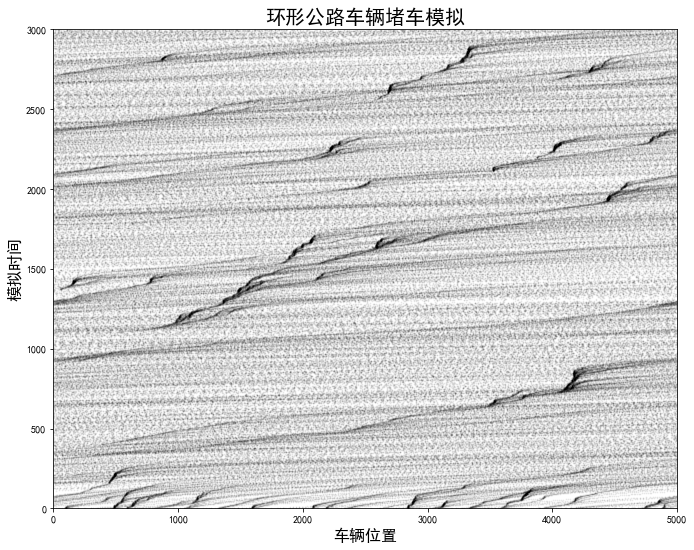

In [33]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


def clip(x, path):
    for i in range(len(x)):
        if x[i] >= path:
            x[i] %= path


if __name__ == "__main__":
    mpl.rcParams['font.sans-serif'] = [u'SimHei']
    mpl.rcParams['axes.unicode_minus'] = False

    path = 5000     # 环形公路的长度
    n = 100         # 公路中的车辆数目
    v0 = 50          # 车辆的初始速度
    p = 0.3         # 随机减速概率
    Times = 3000

    np.random.seed(0)
    x = np.random.rand(n) * path
    x.sort()
    v = np.tile([v0], n).astype(np.float)

    plt.figure(figsize=(10, 8), facecolor='w')
    for t in range(Times):
        plt.scatter(x, [t]*n, s=1, c='k', alpha=0.05)
        for i in range(n):
            if x[(i+1)%n] > x[i]:
                d = x[(i+1) % n] - x[i]   # 距离前车的距离
            else:
                d = path - x[i] + x[(i+1) % n]
            if v[i] < d:
                if np.random.rand() > p:
                    v[i] += 1
                else:
                    v[i] -= 1
            else:
                v[i] = d - 1
        v = v.clip(0, 150)
        x += v
        clip(x, path)
    plt.xlim(0, path)
    plt.ylim(0, Times)
    plt.xlabel(u'车辆位置', fontsize=16)
    plt.ylabel(u'模拟时间', fontsize=16)
    plt.title(u'环形公路车辆堵车模拟', fontsize=20)
    plt.tight_layout(pad=2)
    plt.show()


# 6.3.pandas.py

In [30]:
import numpy as np
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process


def enum_row(row):
    print(row['state'])


def find_state_code(row):
    if row['state'] != 0:
        print(process.extractOne(row['state'], states, score_cutoff=80))


def capital(str):
    return str.capitalize()


def correct_state(row):
    if row['state'] != 0:
        state = process.extractOne(row['state'], states, score_cutoff=80)
        if state:
            state_name = state[0]
            return ' '.join(map(capital, state_name.split(' ')))
    return row['state']


def fill_state_code(row):
    if row['state'] != 0:
        state = process.extractOne(row['state'], states, score_cutoff=80)
        if state:
            state_name = state[0]
            return state_to_code[state_name]
    return ''


if __name__ == "__main__":
    pd.set_option('display.width', 200)
    data = pd.read_excel('sales.xlsx', sheet_name='sheet1', header=0)
#     print('data.head() = \n', data.head())
#     print('data.tail() = \n', data.tail())
#     print('data.dtypes = \n', data.dtypes)
#     print('data.columns = \n', data.columns)
#     for c in data.columns:
#         print(c, end=' ')
#     print()
    data['total'] = data['Jan'] + data['Feb'] + data['Mar']
#     print(data.head())
#     print(data['Jan'].sum())
#     print(data['Jan'].min())
#     print(data['Jan'].max())
#     print(data['Jan'].mean())
#     print('describe:\n', data.describe())
    
    print('=============')
    # 添加一行
    s1 = data[['Jan', 'Feb', 'Mar', 'total']].sum()
    print('s1 = \n', s1)
    s2 = pd.DataFrame(data=s1)
    print('s2 = \n', s2)
    print(s2.T)
    print(s2.T.reindex(columns=data.columns))
    # 即：
    s = pd.DataFrame(data=data[['Jan', 'Feb', 'Mar', 'total']].sum()).T
    s = s.reindex(columns=data.columns, fill_value=0)
    print(s)
    data = data.append(s, ignore_index=True)
    data = data.rename(index={15:'Total'})
    print(data.tail())

    # apply的使用
    print('==============apply的使用==========')
    data.apply(enum_row, axis=1)

    state_to_code = {"VERMONT": "VT", "GEORGIA": "GA", "IOWA": "IA", "Armed Forces Pacific": "AP", "GUAM": "GU",
                     "KANSAS": "KS", "FLORIDA": "FL", "AMERICAN SAMOA": "AS", "NORTH CAROLINA": "NC", "HAWAII": "HI",
                     "NEW YORK": "NY", "CALIFORNIA": "CA", "ALABAMA": "AL", "IDAHO": "ID",
                     "FEDERATED STATES OF MICRONESIA": "FM",
                     "Armed Forces Americas": "AA", "DELAWARE": "DE", "ALASKA": "AK", "ILLINOIS": "IL",
                     "Armed Forces Africa": "AE", "SOUTH DAKOTA": "SD", "CONNECTICUT": "CT", "MONTANA": "MT",
                     "MASSACHUSETTS": "MA",
                     "PUERTO RICO": "PR", "Armed Forces Canada": "AE", "NEW HAMPSHIRE": "NH", "MARYLAND": "MD",
                     "NEW MEXICO": "NM",
                     "MISSISSIPPI": "MS", "TENNESSEE": "TN", "PALAU": "PW", "COLORADO": "CO",
                     "Armed Forces Middle East": "AE",
                     "NEW JERSEY": "NJ", "UTAH": "UT", "MICHIGAN": "MI", "WEST VIRGINIA": "WV", "WASHINGTON": "WA",
                     "MINNESOTA": "MN", "OREGON": "OR", "VIRGINIA": "VA", "VIRGIN ISLANDS": "VI",
                     "MARSHALL ISLANDS": "MH",
                     "WYOMING": "WY", "OHIO": "OH", "SOUTH CAROLINA": "SC", "INDIANA": "IN", "NEVADA": "NV",
                     "LOUISIANA": "LA",
                     "NORTHERN MARIANA ISLANDS": "MP", "NEBRASKA": "NE", "ARIZONA": "AZ", "WISCONSIN": "WI",
                     "NORTH DAKOTA": "ND",
                     "Armed Forces Europe": "AE", "PENNSYLVANIA": "PA", "OKLAHOMA": "OK", "KENTUCKY": "KY",
                     "RHODE ISLAND": "RI",
                     "DISTRICT OF COLUMBIA": "DC", "ARKANSAS": "AR", "MISSOURI": "MO", "TEXAS": "TX", "MAINE": "ME"}
    states = list(state_to_code.keys())
    print(fuzz.ratio('Python Package', 'PythonPackage'))
    print(process.extract('Mississippi', states))
    print(process.extract('Mississipi', states, limit=1))
    print(process.extractOne('Mississipi', states))
    data.apply(find_state_code, axis=1)

    print('Before Correct State:\n', data['state'])
    data['state'] = data.apply(correct_state, axis=1)
    print('After Correct State:\n', data['state'])
    data.insert(5, 'State Code', np.nan)
    data['State Code'] = data.apply(fill_state_code, axis=1)
    print(data)

    # group by
    print('==============group by================')
    print(data.groupby('State Code'))
    print('All Columns:\n')
    print(data.groupby('State Code').sum())
    print('Short Columns:\n')
    print(data[['State Code', 'Jan', 'Feb', 'Mar', 'total']].groupby('State Code').sum())

    # 写入文件
    data.to_excel('sales_result.xls', sheet_name='Sheet1', index=False)


s1 = 
 Jan      1462000
Feb      1507000
Mar       717000
total    3686000
dtype: int64
s2 = 
              0
Jan    1462000
Feb    1507000
Mar     717000
total  3686000
       Jan      Feb     Mar    total
0  1462000  1507000  717000  3686000
   account  name  street  city  state  postal-code      Jan      Feb     Mar    total
0      NaN   NaN     NaN   NaN    NaN          NaN  1462000  1507000  717000  3686000
   account  name  street  city  state  postal-code      Jan      Feb     Mar    total
0        0     0       0     0      0            0  1462000  1507000  717000  3686000
       account                          name                    street             city        state  postal-code      Jan      Feb     Mar    total
11      231907                    Hahn-Moore  18115 Olivine Throughway    Norbertomouth  NorthDakota        31415   150000    10000  162000   322000
12      242368  Frami, Anderson and Donnelly           182 Bertie Road      East Davian         Iowa        72686 

In [31]:
# coding: utf-8

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


if __name__ == '__main__':
    pd.set_option('display.width', 300)

    data = pd.read_csv('tel.csv', skipinitialspace=True, thousands=',')
    print('原始数据：\n', data.head(10))

    le = LabelEncoder()
    for col in data.columns:
        data[col] = le.fit_transform(data[col])

    # 年龄分组
    bins = [-1, 6, 12, 18, 24, 35, 50, 70]
    data['age'] = pd.cut(data['age'], bins=bins, labels=np.arange(len(bins)-1))

    # 取对数
    columns_log = ['income', 'tollten', 'longmon', 'tollmon', 'equipmon', 'cardmon',
                   'wiremon', 'longten', 'tollten', 'equipten', 'cardten', 'wireten', ]
    mms = MinMaxScaler()
    for col in columns_log:
        data[col] = np.log(data[col] - data[col].min() + 1)
        # data[col] = pd.cut(data[col], bins=10, labels=np.arange(10))    # 可不做
        data[col] = mms.fit_transform(data[col].values.reshape(-1, 1))

    # one-hot编码
    # marital/retire/gender/tollfree/equip/callcard/wireless/multline/voice/pager/internet/callwait/forward/confer/ebill
    columns_one_hot = ['region', 'age', 'address', 'ed', 'reside', 'custcat']
    for col in columns_one_hot:
        data = data.join(pd.get_dummies(data[col], prefix=col))

    data.drop(columns_one_hot, axis=1, inplace=True)

    columns = list(data.columns)
    columns.remove('churn')
    x = data[columns]
    y = data['churn']
    print('分组与One-Hot编码后：\n', x.head(10))

    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)

    clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=12, min_samples_split=5,
                                 oob_score=True, class_weight={0: 1, 1: 1/y_train.mean()})
    clf.fit(x_train, y_train)

    # 特征选择
    important_features = pd.DataFrame(data={'features': x.columns, 'importance': clf.feature_importances_})
    important_features.sort_values(by='importance', axis=0, ascending=False, inplace=True)
    important_features['cum_importance'] = important_features['importance'].cumsum()
    print('特征重要度：\n', important_features)
    selected_features = important_features.loc[important_features['cum_importance'] < 0.95, 'features']

    # 重新组织数据
    x_train = x_train[selected_features]
    x_test = x_test[selected_features]

    # 模型训练
    clf.fit(x_train, y_train)
    print('OOB Score: ', clf.oob_score_)
    y_train_pred = clf.predict(x_train)

    print('训练集准确率：', accuracy_score(y_train.values, y_train_pred))
    print('训练集查准率：', precision_score(y_train, y_train_pred))
    print('训练集查全率：', recall_score(y_train, y_train_pred))
    print('训练集f1 Score：', f1_score(y_train, y_train_pred))

    y_test_pred = clf.predict(x_test)
    print('训练集准确率：', accuracy_score(y_test, y_test_pred))
    print('训练集查准率：', precision_score(y_test, y_test_pred))
    print('训练集查全率：', recall_score(y_test, y_test_pred))
    print('训练集f1 Score：', f1_score(y_test, y_test_pred))


原始数据：
    region  tenure  age    marital  address  income                            ed  employ retire  gender  ...    voice pager internet callwait forward  confer  ebill  lninc        custcat  churn
0  Zone 2      13   44    Married        9    64.0                College degree       5     No    Male  ...       No    No       No       No     Yes      No     No   4.16  Basic service    Yes
1  Zone 3      11   33    Married        7   136.0     Post-undergraduate degree       5     No    Male  ...      Yes   Yes       No      Yes     Yes     Yes     No   4.91  Total service    Yes
2  Zone 3      68   52    Married       24   116.0  Did not complete high school      29     No  Female  ...       No    No       No      Yes      No     Yes     No   4.75   Plus service     No
3  Zone 2      33   33  Unmarried       12    33.0            High school degree       0     No  Female  ...       No    No       No       No      No      No     No   3.50  Basic service    Yes
4  Zone 2      23   30 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


特征重要度：
        features  importance  cum_importance
0        tenure    0.092856        0.092856
15      longten    0.091075        0.183931
10      longmon    0.063699        0.247630
3        employ    0.059868        0.307497
17     equipten    0.048708        0.356205
18      cardten    0.046222        0.402427
12     equipmon    0.041598        0.444025
28        lninc    0.041166        0.485192
2        income    0.041043        0.526235
13      cardmon    0.032139        0.558374
16      tollten    0.028305        0.586679
11      tollmon    0.025384        0.612063
7         equip    0.023696        0.635759
23     internet    0.019828        0.655588
14      wiremon    0.019413        0.675000
19      wireten    0.016825        0.691825
27        ebill    0.013729        0.705554
8      callcard    0.010041        0.715595
21        voice    0.008847        0.724442
37        age_5    0.008536        0.732978
91         ed_2    0.007882        0.740860
29     region_0    0.007

# one hot编码
http://blog.csdn.net/dulingtingzi/article/details/51374487